In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import datetime
import pandas as pd

import lmfit 

In [2]:
from subnautica_carthography import positioning as sp

from importlib import reload

# Instantiating the coordinate logger

In [4]:
from subnautica_carthography import coordinate_logging as cl
reload(cl)

<module 'subnautica_carthography.coordinate_logging' from '/Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/subnautica_carthography/coordinate_logging.py'>

In [5]:
clog = cl.CoordinateLogger(beacon_log_fn='subnautica_beacons', depth_log_fn='subnautica_depths')

In [6]:
# clog.write_coords_to_beacon_log("LP5", 0, 0, 0)
# clog.write_coords_to_beacon_log("N1", 0, 100, 0)
# clog.write_coords_to_beacon_log("E1", 100, 0, 0)
# clog.write_coords_to_beacon_log("S1", 0, -100, 0)
# clog.write_coords_to_beacon_log("W1", -100, 0, 0)


## The beacon log after adding the standard position beacons 

In [7]:
clog.beacon_log

beacon      x      y  z                       added
0    LP5    0.0    0.0  0  2021-07-31 15:05:45.040322
1     N1    0.0  100.0  0  2021-07-31 15:05:45.062177
2     E1  100.0    0.0  0  2021-07-31 15:05:45.073471
3     S1    0.0 -100.0  0  2021-07-31 15:05:45.085368
4     W1 -100.0    0.0  0  2021-07-31 15:33:49.710967

### removing beacons added by accident: 

In [8]:


# clog._write_beacon_log(clog.beacon_log.drop([5]))

## Logging beacons and depths

### A beacon can be added using "log-beacon"

In [9]:
# clog.log_beacon(name="beacon_name", 
#                 observations = [("N1", 355), 
#                                 ("E1", 243), 
#                                 ("S1", 100)],
#                 depth=100)
# clog.beacon_log

In [12]:
clog.log_beacon

<bound method CoordinateLogger.log_beacon of <subnautica_carthography.coordinate_logging.CoordinateLogger object at 0x129245b80>>

In [13]:
clog.log_depth

<bound method CoordinateLogger.log_depth of <subnautica_carthography.coordinate_logging.CoordinateLogger object at 0x129245b80>>

In [14]:
clog.depth_log

x    y    z                       added
0    0    0  -20  2021-07-31 15:51:32.720222
1    0  100  -50  2021-07-31 15:51:32.732288
2  100    0  -30  2021-07-31 15:51:32.741039
3    0 -100 -150  2021-07-31 15:51:32.750956
4 -100    0   15  2021-07-31 15:51:32.759644

In [15]:
# clog.write_coords_to_depth_log(0, 0, -20)
# clog.write_coords_to_depth_log(0, 100, -50)
# clog.write_coords_to_depth_log(100, 0, -30)
# clog.write_coords_to_depth_log(0, -100, -150)
# clog.write_coords_to_depth_log(-100, 0, 15)

# Create a nautical chart from the measured depths

NameError: name 'clog' is not defined

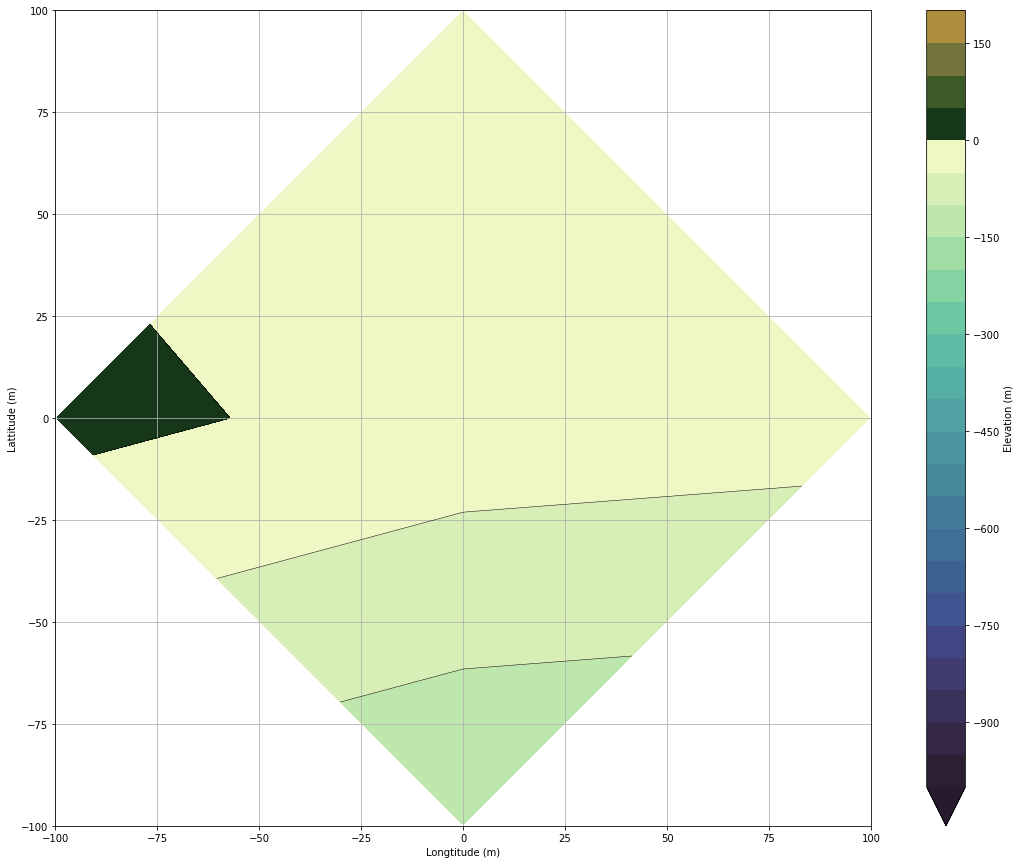

In [16]:
f, ax = clog.make_nautical_chart()


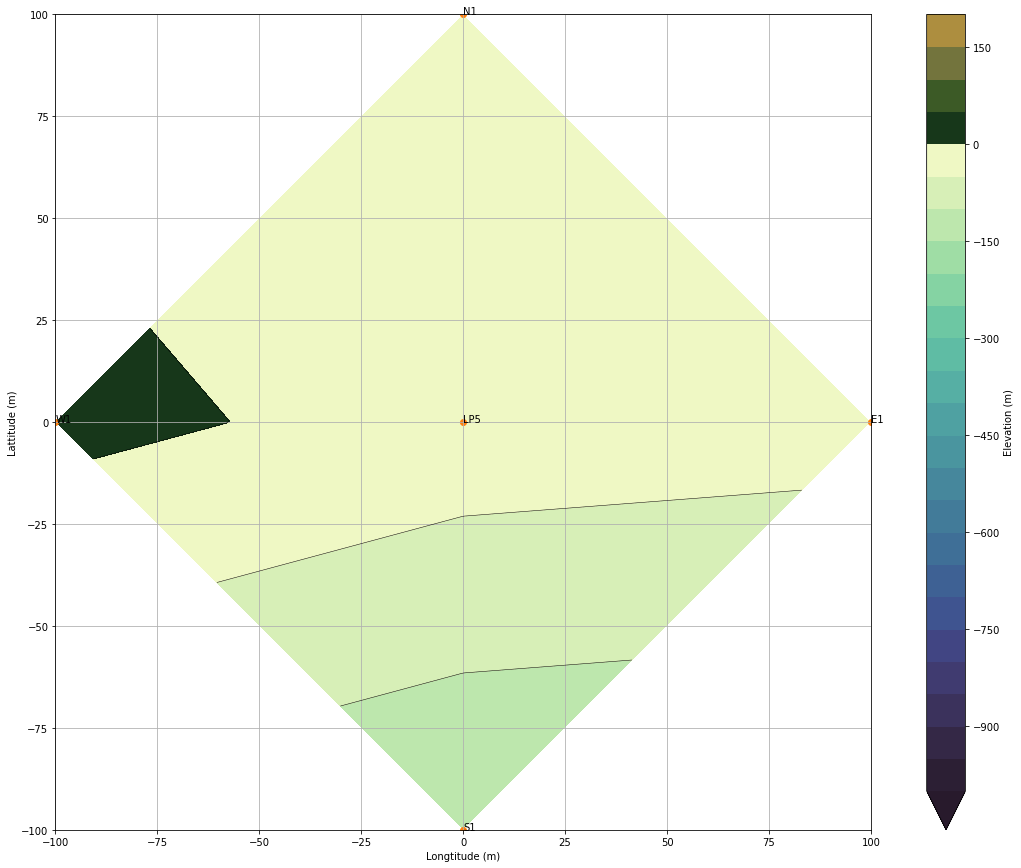

In [55]:
ax.scatter(clog.beacon_log['x'], clog.beacon_log['y'], c='C1')
for idx, beacon in clog.beacon_log.iterrows():
    ax.annotate(beacon['beacon'], (beacon['x'], beacon['y']))
f

In [51]:
beacon['beacon']

'W1'

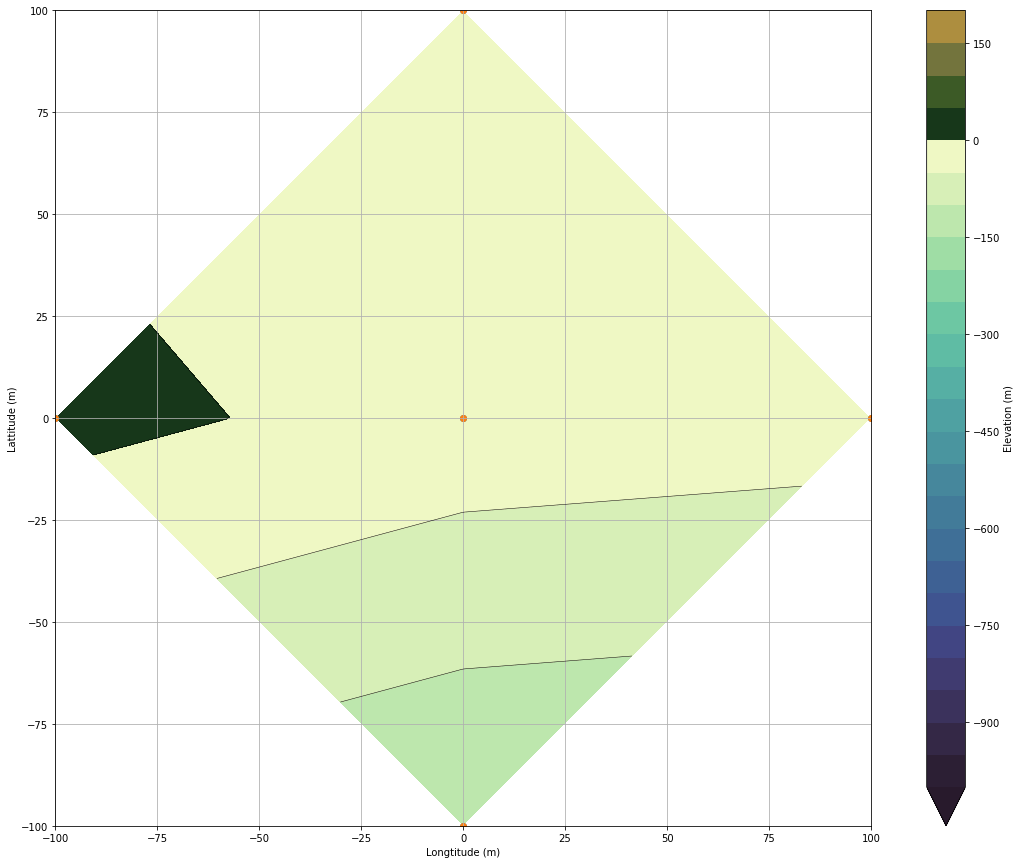

In [40]:
f

In [37]:
from subnautica_carthography import visualization as vis


<module 'subnautica_carthography.visualization' from '/Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/subnautica_carthography/visualization.py'>

In [41]:
from cmocean import cm

In [61]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-1500., vcenter=0., vmax=50)

In [19]:
clog.beacon_log

beacon      x      y  z                       added
0    LP5    0.0    0.0  0  2021-07-31 15:05:45.040322
1     N1    0.0  100.0  0  2021-07-31 15:05:45.062177
2     E1  100.0    0.0  0  2021-07-31 15:05:45.073471
3     S1    0.0 -100.0  0  2021-07-31 15:05:45.085368
4     W1 -100.0    0.0  0  2021-07-31 15:33:49.710967

Reading beacon log from /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210731_subnautica_beacons.csv


/Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/subnautica_carthography/visualization.py:62: UserWarning: No contour levels were found within the data range.
  ax.contour(


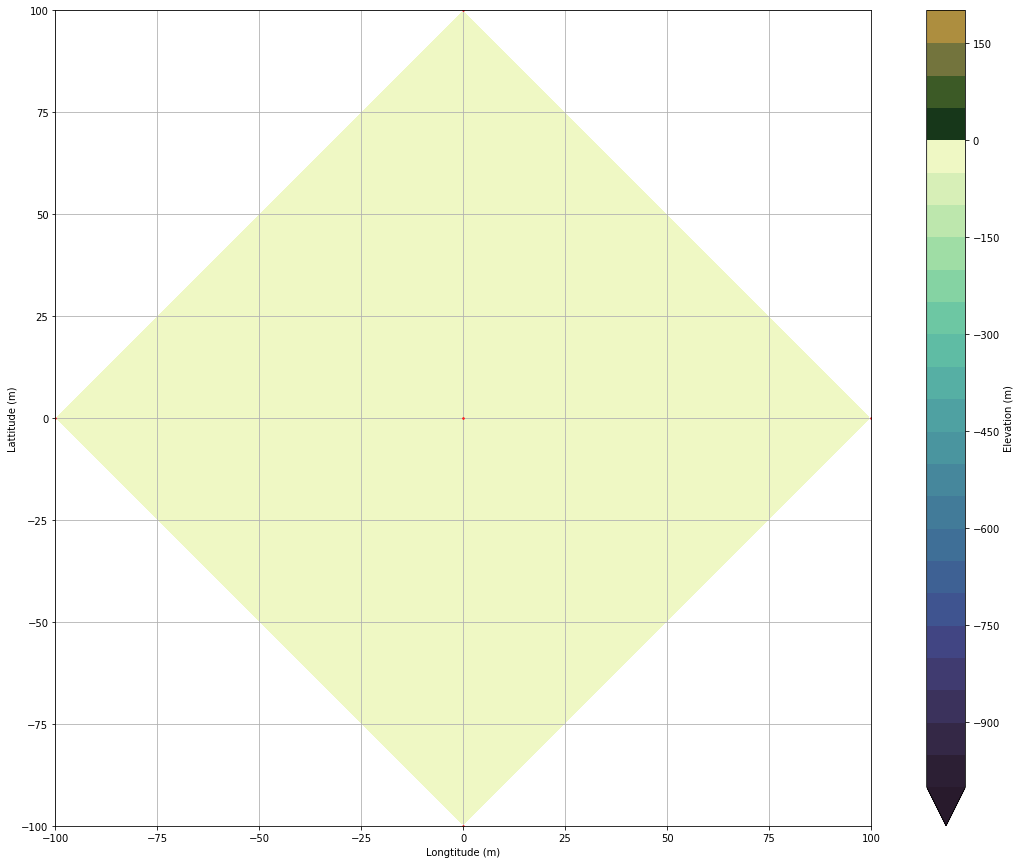

In [83]:
reload(vis)
f, ax = vis.plot_nautical_chart(clog.beacon_log)

In [84]:
ax.get_ylim()

(-100.0, 100.0)

In [71]:
ax.get_xlim()

(0.0, 100.0)

In [ ]:
set_

In [101]:
reload(sp)

<module 'subnautica_carthography.positioning' from '/Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/subnautica_carthography/positioning.py'>

In [102]:
sp.default_beacons = clog.beacon_log

Reading beacon log from /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210725_beacons.csv


In [103]:
TEST_LOCATION = (312, 273, -129)

sp.default_beacons

# generate some observations
distances = []
beacon_names = []

for i, beacon_name in enumerate(sp.default_beacons.beacon):
    beacon_names.append(beacon_name)
    d = sp.distance_to_beacon(*TEST_LOCATION, beacon_ID=i)
    distances.append(d)

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [81]:
distances

[379.3599873471107, 368.9363088664492, 510.79741581178735, 503.1043629307939]

In [82]:
beacon_names

['N1', 'E1', 'S1', 'W1']

In [83]:
# bl.loc[len(bl)]  = ["LP5", 0, 0, 0, datetime.datetime.now()]
# bl.loc[len(bl)]  = ["N1", 0, 100, 0, datetime.datetime.now()]
# bl.loc[len(bl)]  = ["E1", 0, 100, 0, datetime.datetime.now()]
# bl.loc[len(bl)]  = ["S1", -100, 0, 0, datetime.datetime.now()]
# bl.loc[len(bl)]  = ["W1", 0, -100, 0, datetime.datetime.now()]

In [85]:
clog.beacon_log

Reading beacon log from /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210725_beacons.csv


beacon    x    y  z                       added
0     N1    0  100  0  2021-07-25 14:23:55.861397
1     E1  100    0  0  2021-07-25 14:23:55.874006
2     S1 -100    0  0  2021-07-25 14:23:55.886324
3     W1    0 -100  0  2021-07-25 14:23:55.896396

In [86]:
distances

[379.3599873471107, 368.9363088664492, 510.79741581178735, 503.1043629307939]

In [88]:
observations = []
for d, n in zip (distances, beacon_names):
    observations.append((d, n))

In [95]:
clog.add_beacon("test_loc", observations, depth=None)

Fitting observations to determine location
x: x, y: y, z: z
Reading beacon log from /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210725_beacons.csv
writing beacon                      test_loc
x                                  x
y                                  y
z                                  z
added     2021-07-25 23:09:54.269686
Name: 5, dtype: object to beacon log
Writing beacon log to /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210725_beacons.csv


In [91]:
clog.beacon_log

Reading beacon log from /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210725_beacons.csv


beacon     x     y  z                       added
0        N1     0   100  0  2021-07-25 14:23:55.861397
1        E1   100     0  0  2021-07-25 14:23:55.874006
2        S1  -100     0  0  2021-07-25 14:23:55.886324
3        W1     0  -100  0  2021-07-25 14:23:55.896396
4  test_loc     x     y  z  2021-07-25 23:07:59.224404

In [286]:
clog.depth_log

Reading depth log from /Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/logged_coordinates/210725_depths.csv


Empty DataFrame
Columns: [beacon, x, y, z, added]
Index: []

In [140]:
from datetime import date
today = date.today()

datestring = today.strftime("%y%m%d")


In [143]:
sp.DEFAULT_beaconS.to_csv(f"../logged_coordinates/{datestring}_beacons.csv")

## Generate some test observations

In [27]:
test_location = (312, 273, -129)

# generate some observations 
distances = []
ref_buouys = [] 

for i, beacon_name in enumerate(sp.DEFAULT_beaconS.beacon):
    
    ref_buouys.append(beacon_name)
    d = sp.distance_to_beacon(*test_location, beacon_ID=i)
    distances.append(d)
    
    
    


In [71]:
ref_buouys

beacon_IDs = []
for ref_buouy in ref_buouys:
    ID = sp.DEFAULT_beaconS.index[sp.DEFAULT_beaconS["beacon"] == ref_buouy][0]
    beacon_IDs.append(ID)

In [72]:
beacon_IDs

[0, 1, 2, 3, 4]

In [76]:
sp.DEFAULT_beaconS.loc[0]

beacon    LP5
x         0
y         0
z         0
Name: 0, dtype: object

In [78]:
%xmode

Exception reporting mode: Verbose


In [85]:
beacon_ID=0
reference_beacons = sp.DEFAULT_beaconS
_, xb, yb, zb = reference_beacons.loc[beacon_ID]

In [86]:
_, xb, yb, zb

('LP5', 0, 0, 0)

In [81]:

    # test horizontal x distance
sp.distance_to_beacon(100, 0, 0, beacon_ID=0) 
    # test horizontal y distance
sp.distance_to_beacon(0, 0, 0, beacon_ID=1) 

#     # x,y combined distance
# sp.distance_to_beacon(220, 0, 0, beacon_ID=1) == np.sqrt(1000**2+220**


#     # y,z combined distance
# sp.distance_to_beacon(0, 0, -220, beacon_ID=1) == np.sqrt(1000**2+220**


1000.0

In [122]:
distances = [int(d) for d in distances]

In [108]:
reload(sp)

<module 'subnautica_carthography.positioning' from '/Users/adriaanrol/GitHubRepos/Personal/subnautica_carthography/subnautica_carthography/positioning.py'>

In [112]:
params = dist_model.make_params()


<Parameter 'x', value=-inf, bounds=[-inf:inf]>

In [125]:
dist_model = lmfit.Model(sp.distance_to_beacons, independent_vars=["beacon_IDs"])
dist_model.set_param_hint("x", value=0, vary=True)
dist_model.set_param_hint("y", value=0, vary=True)
dist_model.set_param_hint("z", value=test_location[2], vary=False)
fit_results = dist_model.fit(distances, beacon_IDs = beacon_IDs)


In [128]:
fit_results.success

True

In [131]:
fit_results.best_values

{'x': 311.8605111093435, 'y': 273.10136385331646, 'z': -129}

<AxesSubplot:title={'center':'Model(distance_to_beacons)'}, xlabel='beacon_IDs', ylabel='y'>

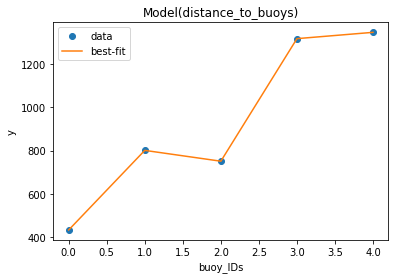

In [127]:
fit_results.plot_fit()

In [93]:
dist_model.func(423,78,86,0)


438.6445029861881

In [39]:
dist_model.param_names

['x', 'y', 'z']

Int64Index([0], dtype='int64')

In [6]:
_beacons = [
    ("LP5", 0, 0, 0),
    ("N1", 0, 1000, 0),
    ("E1", 1000, 0, 0),
    ("S1", 0, -1000, 0),
    ("W1", -1000, 0, 0),
]


DEFAULT_beaconS = pd.DataFrame(_beacons, columns=["beacon", "x", "y", "z"])



In [7]:
my_loc = 



In [3]:
DEFAULT_beaconS

NameError: name 'DEFAULT_beaconS' is not defined

In [43]:
_,x,y,z = DEFAULT_beaconS.loc[0]

In [44]:
x

0

In [4]:
DEFAULT_beaconS = pd.DataFrame(_beacons, columns=["beacon", "x", "y", "z"])


NameError: name '_beacons' is not defined

In [11]:
from cmocean import cm
from quantify_core.visualization import mpl_plotting as qpl
from quantify_core.visualization.plot_interpolation import interpolate_heatmap

In [50]:
DEFAULT_beaconS

beacon     x     y  z
0  LP5     0     0  0
1   N1     0  1000  0
2   E1  1000     0  0
3   S1     0 -1000  0
4   W1 -1000     0  0

In [8]:
distances = (200, 300, 500)
ref_beacons = ['LP5', "N1", "E1"]

observations = pd.DataFrame(columns = ['ref_beacon', "xb", 'yb', 'yz', 'r'])

for distance, ref_beacon_name in zip(distances, ref_beacons):
    ref_bouy = DEFAULT_beaconS.loc[DEFAULT_beaconS['beacon'] == ref_beacon_name]
    
    # observations.append([beacon, xb, yb, zb, distance], columns=observations.columns)
    observations.loc[len(observations)]=[beacon, float(ref_bouy['x']), float(ref_bouy['y']), float(ref_bouy['z']), distance]





NameError: name 'beacon' is not defined

In [115]:
observations

ref_beacon      xb      yb   yz    r
0     beacon     0.0     0.0  0.0  200
1     beacon     0.0  1000.0  0.0  300
2     beacon  1000.0     0.0  0.0  500

In [101]:
b = DEFAULT_beaconS.loc[DEFAULT_beaconS['beacon'] == ref_beacon]
_, xb, yb, zb = b   

In [112]:
float(b['x'])

1000.0

In [100]:
b['beacon']

2    E1
Name: beacon, dtype: object

In [84]:
observations

ref_beacon xb yb yz    r
0     beacon  x  y  z  200
1     beacon  x  y  z  300
2     beacon  x  y  z  500

In [81]:
observations.loc[len(observations)]=[beacon, xb, yb, zb, distance]

In [82]:
observations

ref_beacon xb yb yz    r
0     beacon  x  y  z  200
1     beacon  x  y  z  200

In [76]:
observations.columns

Index(['ref_beacon', 'xb', 'yb', 'yz', 'r'], dtype='object')

In [77]:
observations.append([beacon, xb, yb, zb, distance], columns=['ref_beacon', 'xb', 'yb', 'yz', 'r'])

TypeError: append() got an unexpected keyword argument 'columns'

In [72]:
    observations.append([beacon, xb, yb, zb, distance])

0    r ref_beacon   xb   yb   yz
0  beacon  NaN      NaN  NaN  NaN  NaN
1     x  NaN      NaN  NaN  NaN  NaN
2     y  NaN      NaN  NaN  NaN  NaN
3     z  NaN      NaN  NaN  NaN  NaN
4   500  NaN      NaN  NaN  NaN  NaN

In [57]:
beacon["distance"] = 5

<ipython-input-57-2deb16db8c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beacon["distance"] = 5


In [12]:

# coords

In [13]:
def plot_depth(coords):
    f, ax =plt.subplots(figsize=(20, 15))
    # ax.pcolormesh(X,Y,Z)
    interpolated_dataset = interpolate_heatmap(coords['x'], coords['y'], coords['z'], n=400)
    extent = (
        min(interpolated_dataset[0]),
        max(interpolated_dataset[0]),
        min(interpolated_dataset[1]),
        max(interpolated_dataset[1]),
    )

    # mappable = ax.imshow(
    #     interpolated_dataset[2],
    #     extent=extent,
    #     aspect="auto",
    #     origin="lower",
    #     cmap=cm.deep_r,
    #     vmin=-500,
    # )

    levels=np.linspace(-450,450, 41)

    ax.contour(interpolated_dataset[0], interpolated_dataset[1], interpolated_dataset[2],
        levels=levels,colors='black', linestyles='solid', linewidths=.5,
    )
    mappable = ax.contourf(
        interpolated_dataset[0], interpolated_dataset[1], interpolated_dataset[2], cmap=cm.topo, 
        levels=levels,
        vmin=-500,vmax=500, extend='min',
    )

    mappable.set_clim(-500,500)
    cbar = f.colorbar(mappable, ax=ax)
    # cbar.

    # Scatter plot of measured datapoints
    ax.plot(
        coords['x'],
        coords['y'],
        marker=".",
        linewidth=0.5,
        linestyle="",
        markerfacecolor="white",
        markeredgecolor="red",
        markersize=3,
        c="white",
        alpha=1,
    )
    ax.set_aspect('equal')
    ax.grid()

    qpl.set_xlabel(
        ax, "Longtitude", "m"
    )
    qpl.set_ylabel(
        ax, "Lattitude", "m"
    )

    qpl.set_cbarlabel(cbar, 'Elevation', "m")

    return f, ax 



In [17]:
pd.DataFrame

pandas.core.frame.DataFrame

In [18]:
plt.Axes

matplotlib.axes._axes.Axes

In [16]:
coords

Unnamed: 0     x     y     z      Notes
0          0.0     0     0   -25  Lifepod 5
1          1.0     0  3000 -1000      North
2          2.0  3000  3000 -1000         NE
3          3.0  3000     0 -1000       East
4          4.0  3000 -3000 -1000         SE
..         ...   ...   ...   ...        ...
87         NaN  -260  1030  -230        NaN
88         NaN     0  1090  -486        NaN
89         NaN  -240  1050  -250        NaN
90         NaN  -350   950  -100        NaN
91         NaN  -140   690  -100        NaN

[92 rows x 5 columns]

(-1750.0, 1750.0)

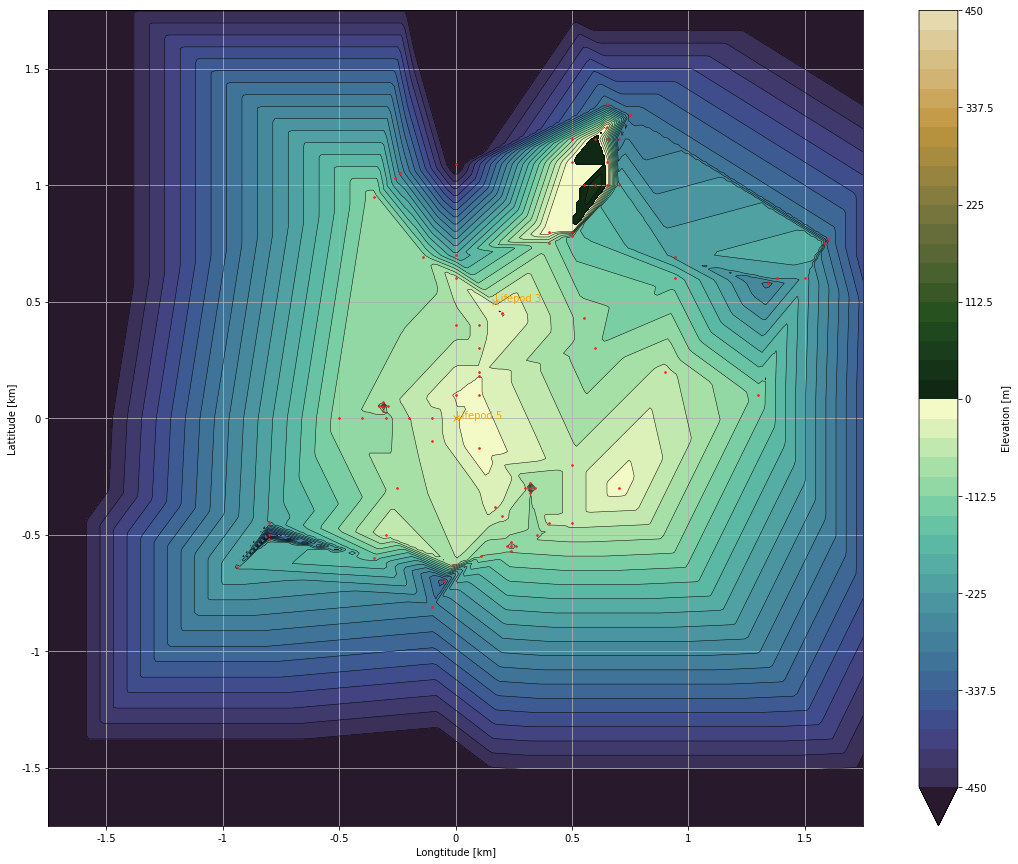

In [15]:
coords = pd.read_csv('210711_coordinates.csv')
f, ax = plot_depth(coords)

ax.plot(0,0, marker='x', color='orange', label='Lifepod 5')
ax.text(0,0, 'Lifepod 5', color='Orange')
ax.plot(170,500, marker='x', color='orange', label='Lifepod 3')
ax.text(170,500, 'Lifepod 3', color='Orange')

ax.set_xlim(-1750, 1750)
ax.set_ylim(-1750, 1750)

## Using automatic triangulation

In [4]:
import lmfit
import numpy as np

In [ ]:
beacons = {"LP5": (0,0,0), }

In [5]:
beacon_positions = [
    [0, 0, 0], 
    [0,1000,0],
    [1000,0,0], 
    [0,-1000,0], 
    [-1000,0,0], 
]

def distance(beacon_idx, x, y, z):
    
    xb, yb, zb = beacon_positions[beacon_idx]
    distance = np.sqrt((x-xb)**2+(y-yb)**2+(z-zb)**2)
    return distance
    
    


In [6]:
distance(0, 300, 235, -45)

383.7316770869979

In [7]:
beacons = 

NameError: name 'self' is not defined

In [ ]:

(coords, error) = location.calculate_coordinates(self._beacons)
print("Position: %.0f / %.0f depth %.0f (error %.0f)" % (coords.x, coords.y, coords.z, error))